<a href="https://colab.research.google.com/github/ram574/Gelato-Case-Study/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting the Posttest Scores of Students using  features

Importing neccesary libraries and loading the data set 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression




df = pd.read_csv("/content/drive/MyDrive/Machine_learning/Galeto_Case_Study/test_scores.csv")

In [3]:
df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
5,ANKYI,Urban,Non-public,6OL,Standard,20.0,7YZO8,Female,Does not qualify,66.0,74.0
6,ANKYI,Urban,Non-public,6OL,Standard,20.0,9KMZD,Male,Does not qualify,63.0,75.0
7,ANKYI,Urban,Non-public,6OL,Standard,20.0,9USQK,Female,Does not qualify,63.0,72.0
8,ANKYI,Urban,Non-public,6OL,Standard,20.0,CS5QP,Male,Does not qualify,64.0,77.0
9,ANKYI,Urban,Non-public,6OL,Standard,20.0,D6HT8,Female,Does not qualify,61.0,72.0


Exploratory Data Analysis

In [4]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [5]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [6]:
df.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [8]:
df.school.unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

In [9]:
df.n_student.unique()

array([20., 21., 18., 15., 16., 19., 17., 28., 27., 24., 14., 22., 23.,
       31., 25., 26., 29., 30.])

In [10]:
df.posttest.unique()

array([ 72.,  79.,  76.,  77.,  74.,  75.,  73.,  78.,  71.,  70.,  68.,
        66.,  65.,  67.,  63.,  69.,  82.,  87.,  80.,  83.,  81.,  84.,
        85.,  91.,  86.,  64.,  88.,  61.,  62.,  58.,  57.,  59.,  56.,
        60.,  55.,  54.,  49.,  53.,  52.,  50.,  51.,  48.,  39.,  43.,
        45.,  47.,  42.,  44.,  46.,  41.,  36.,  40.,  32.,  38.,  35.,
        34.,  93.,  90.,  92.,  97.,  95.,  99.,  89.,  94.,  96.,  98.,
       100.,  37.])

In [11]:
df.pretest.unique()

array([62., 66., 64., 61., 63., 60., 67., 57., 56., 58., 54., 59., 65.,
       55., 68., 73., 70., 74., 76., 69., 75., 78., 72., 71., 49., 53.,
       48., 52., 50., 46., 44., 51., 47., 43., 37., 40., 39., 41., 38.,
       45., 36., 42., 31., 35., 33., 27., 30., 34., 32., 29., 28., 23.,
       26., 77., 79., 82., 80., 85., 83., 84., 86., 89., 93., 88., 81.,
       87., 91., 22., 25.])

In [12]:
print(df.corr())

           n_student   pretest  posttest
n_student   1.000000 -0.499253 -0.504886
pretest    -0.499253  1.000000  0.950884
posttest   -0.504886  0.950884  1.000000


When applied to an entire dataframe, the corr() function returns a dataframe of  pair-wise correlation between the columns. We can see that there’s a weak negative correlation between scores of n_students and pretest/posttest. Also, notice that the values on the diagonal are 1s, this is because each column is perfectly correlated with itself.

A positive correlation indicates that the values tend to increase with one another
A negative correlation indicates that values in one set tend to decrease with an increase in the other set

In [13]:
print(df['n_student'].corr(df['posttest']))

-0.5048864411228163


In [14]:
print(df['n_student'].corr(df['pretest']))

-0.49925313316153025


In [15]:
 print(df['pretest'].corr(df['posttest']))

0.9508842857175765


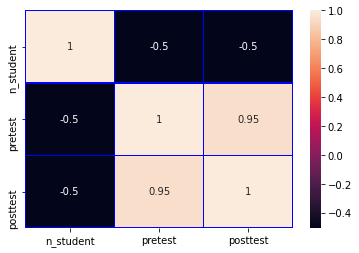

In [16]:
corr = df.corr()
 
sns.heatmap(corr, annot=True, linewidth=.6, linecolor="blue")

plt.show()

Displaying the count and percentage of our features

In [17]:
for x in ["school"]:
    for val in df[x].unique():
        count = df[x].value_counts()[val]
        percent = df[x].value_counts(normalize=True)[val] * 100
        print(f"{val} - Count: {count}, Percentage: {percent:.2f}%")
    print()

ANKYI - Count: 41, Percentage: 1.92%
CCAAW - Count: 109, Percentage: 5.11%
CIMBB - Count: 74, Percentage: 3.47%
CUQAM - Count: 107, Percentage: 5.02%
DNQDD - Count: 122, Percentage: 5.72%
FBUMG - Count: 46, Percentage: 2.16%
GJJHK - Count: 118, Percentage: 5.53%
GOKXL - Count: 64, Percentage: 3.00%
GOOBU - Count: 158, Percentage: 7.41%
IDGFP - Count: 94, Percentage: 4.41%
KFZMY - Count: 52, Percentage: 2.44%
KZKKE - Count: 111, Percentage: 5.20%
LAYPA - Count: 57, Percentage: 2.67%
OJOBU - Count: 81, Percentage: 3.80%
QOQTS - Count: 149, Percentage: 6.99%
UAGPU - Count: 87, Percentage: 4.08%
UKPGS - Count: 128, Percentage: 6.00%
UUUQX - Count: 84, Percentage: 3.94%
VHDHF - Count: 51, Percentage: 2.39%
VKWQH - Count: 100, Percentage: 4.69%
VVTVA - Count: 114, Percentage: 5.34%
ZMNYA - Count: 69, Percentage: 3.23%
ZOWMK - Count: 117, Percentage: 5.49%



In [18]:
for x in ["school_setting", "school_type", "teaching_method", "gender", "lunch"]:
    for val in df[x].unique():
        count = df[x].value_counts()[val]
        percent = df[x].value_counts(normalize=True)[val] * 100
        print(f"{val} - Count: {count}, Percentage: {percent:.2f}%")
    print()

Urban - Count: 906, Percentage: 42.48%
Suburban - Count: 717, Percentage: 33.61%
Rural - Count: 510, Percentage: 23.91%

Non-public - Count: 551, Percentage: 25.83%
Public - Count: 1582, Percentage: 74.17%

Standard - Count: 1373, Percentage: 64.37%
Experimental - Count: 760, Percentage: 35.63%

Female - Count: 1056, Percentage: 49.51%
Male - Count: 1077, Percentage: 50.49%

Does not qualify - Count: 1215, Percentage: 56.96%
Qualifies for reduced/free lunch - Count: 918, Percentage: 43.04%



In [19]:
df.mean()

n_student    22.796531
pretest      54.955931
posttest     67.102203
dtype: float64

In [20]:
df.median()

n_student    22.0
pretest      56.0
posttest     68.0
dtype: float64

understanding the probability distribution between the variables of a dataframe


When a distribution has lower variability, the values in a dataset are more consistent. However, when the variability is higher, the data points are more dissimilar and extreme values become more likely. Consequently, understanding variability helps you grasp the likelihood of unusual events.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


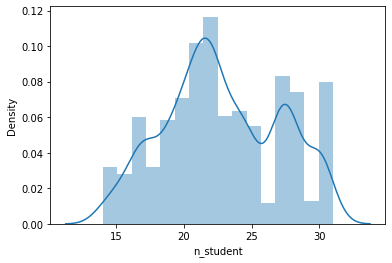

In [21]:
sns.distplot(df["n_student"])

From the above plot number of students in a class feature has a non-uniform in distribution. The mean and median values are values apart. As you can see the ‘n_student’ plot is right-skewed (long tail on the right) it has its mean greater than its median.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


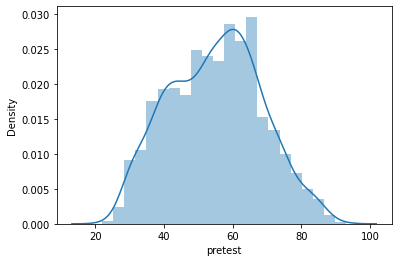

In [22]:
sns.distplot(df["pretest"])

The aboveplot is a uniform distribution of values in the ‘pretest’ feature. Thus, the feature is perfectly formatted with mean and median values close to each other.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


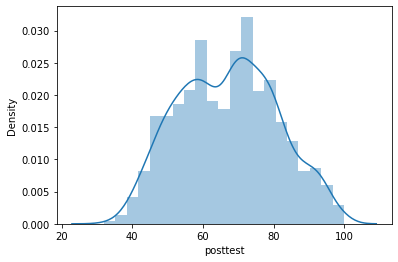

In [23]:
sns.distplot(df["posttest"])

The above plot is a uniform distribution of values in the ‘posttest’ feature. Thus, the feature is perfectly formatted with mean and median values close to each other.

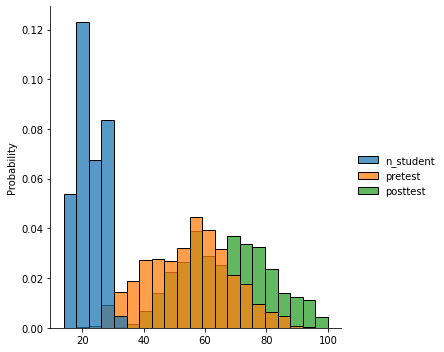

In [24]:
sns.displot(df[["n_student", "pretest","posttest"]], stat="probability")

comparing features i observed distribution is a uniform distribution so, our data can yied good machine learning model

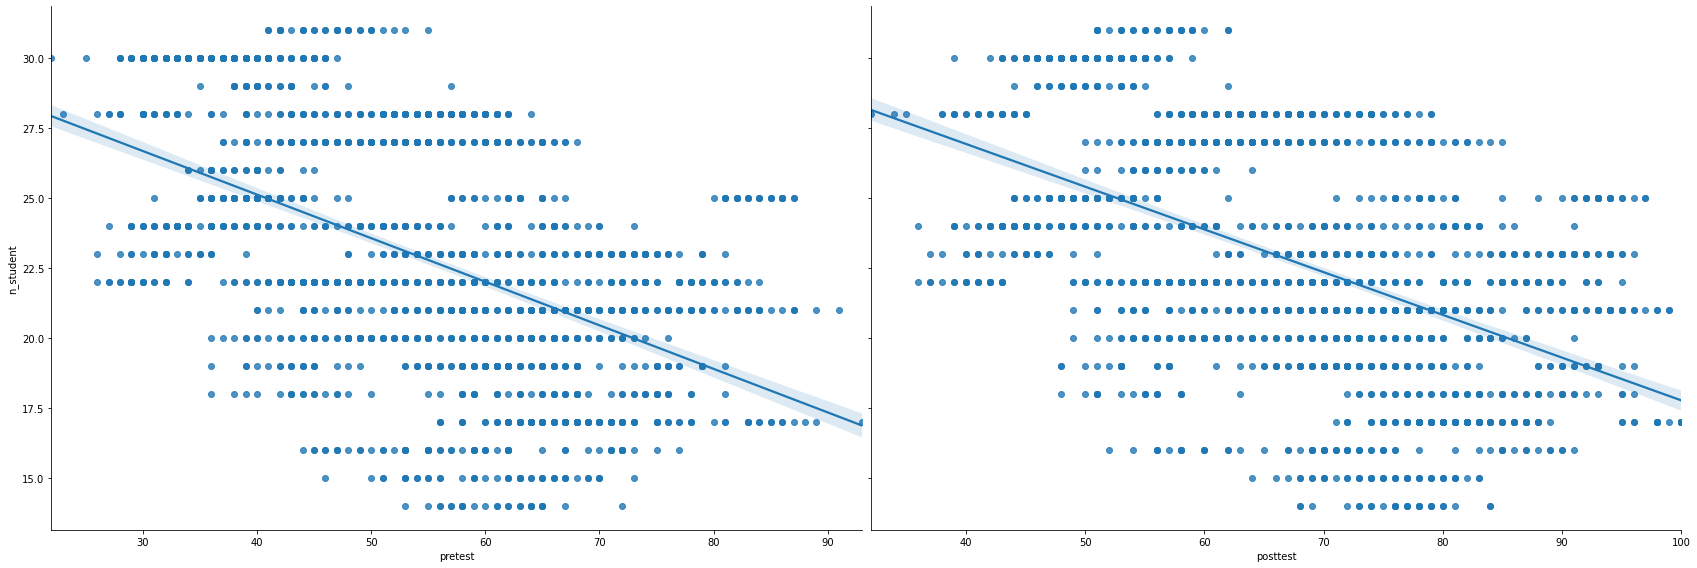

In [25]:
sns.pairplot(df, x_vars=["pretest", "posttest"], y_vars=["n_student"],height=8, aspect=1.5, kind="reg");

We can clearly observe from below regressions that when strength of class is less then the pretest and posttest score is increased

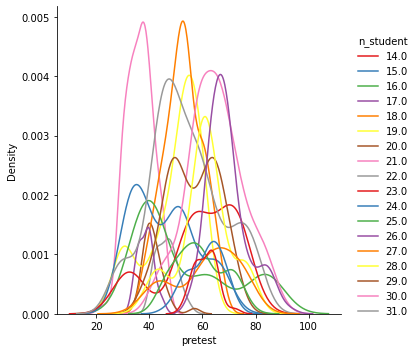

In [26]:
sns.displot(df, x="pretest", hue="n_student", kind="kde",palette="Set1")

If you observe clearly the uniform distribution of classes are high and non-uniform distribution of classes is low in the pretest scores



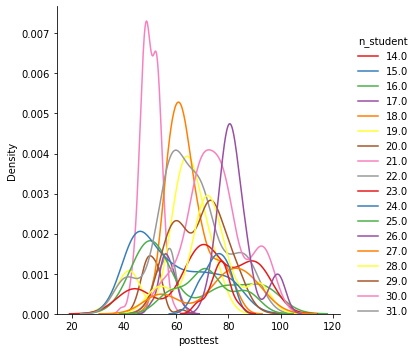

In [27]:
sns.displot(df, x="posttest", hue="n_student", kind="kde",palette="Set1")

If you observe clearly the uniform distribution of classes are high and non-uniform distribution of classes is low in the posttest scores



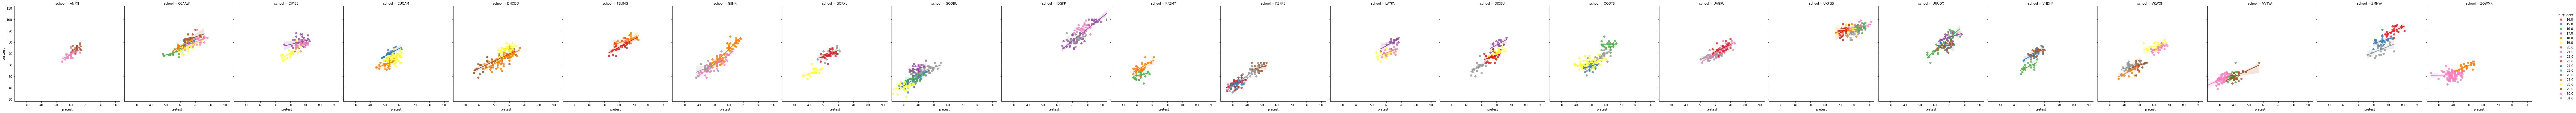

In [28]:
sns.lmplot(x="pretest", y="posttest", hue="n_student", col="school", data=df, palette="Set1");

From the above regression, i observed the IDGFP has highest test scores and GOOBU, KZKKE, VVTA schools has less test scores

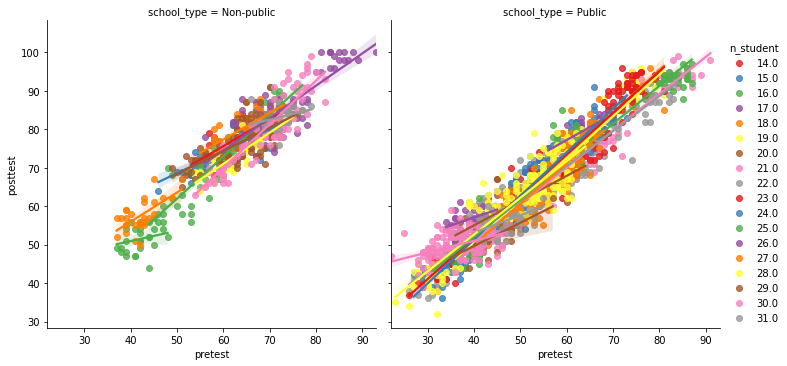

In [29]:
sns.lmplot(x="pretest", y="posttest", hue="n_student", col="school_type", data=df, palette="Set1");

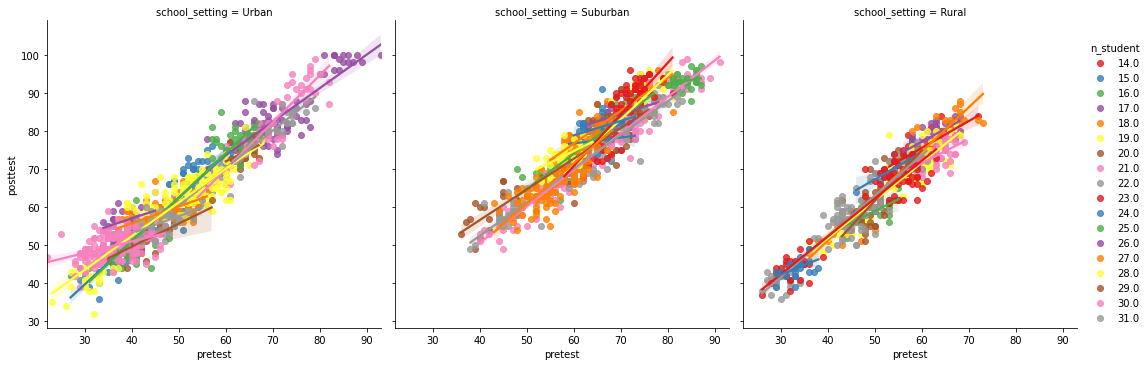

In [30]:
sns.lmplot(x="pretest", y="posttest", hue="n_student", col="school_setting", data=df, palette="Set1");

As observed, urban area has major number of students who took both pretest and posttest and also urban area students has highest score in both pretest and posttest scores

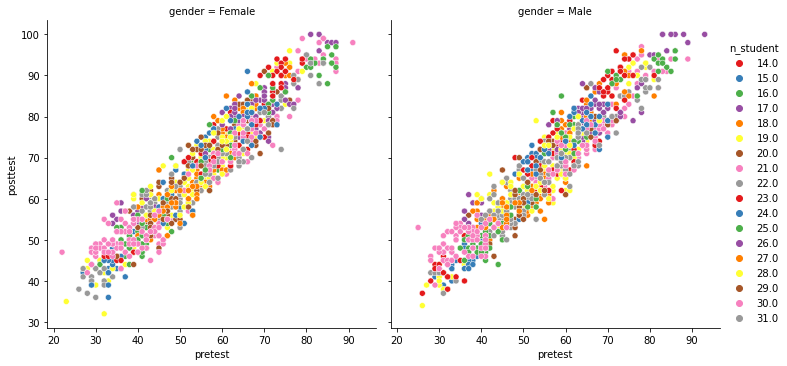

In [31]:
sns.relplot(x="pretest", y="posttest", hue="n_student", col="gender", data=df,  palette="Set1");

Both Male and female has highest test scores and class 17 & 26 stands first place in top scores in both phases

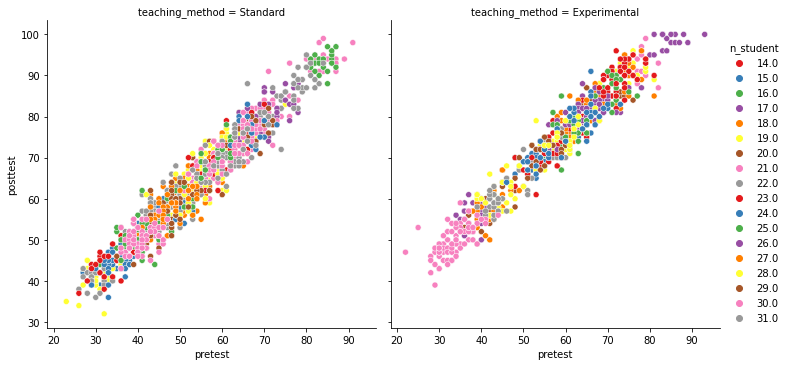

In [32]:
sns.relplot(x="pretest", y="posttest", hue="n_student", col="teaching_method", ci=None, kind="scatter", data=df, palette="Set1");

Class 26 and 17 stands top scorers in experimental teaching in posttest
class 16 and 25 stands top scorers in standard teaching in pretest


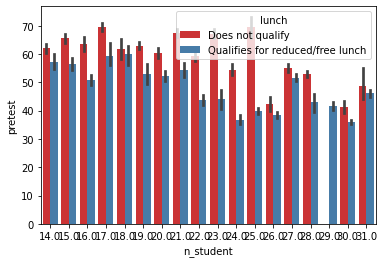

In [33]:
sns.barplot(x="n_student", y="pretest", hue="lunch",data=df,palette="Set1");

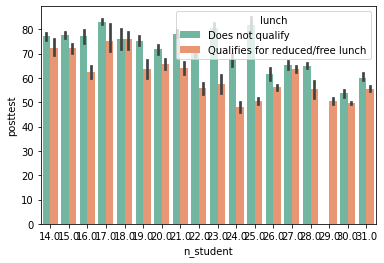

In [34]:

sns.barplot(x="n_student", y="posttest", hue="lunch",data=df,palette="Set2");
#sns.lmplot(x="pretest", y="posttest", hue="n_student", col="lunch", data=df, palette="Set1");

Classes has more in doesnot qualified for lunch even they have high test scores

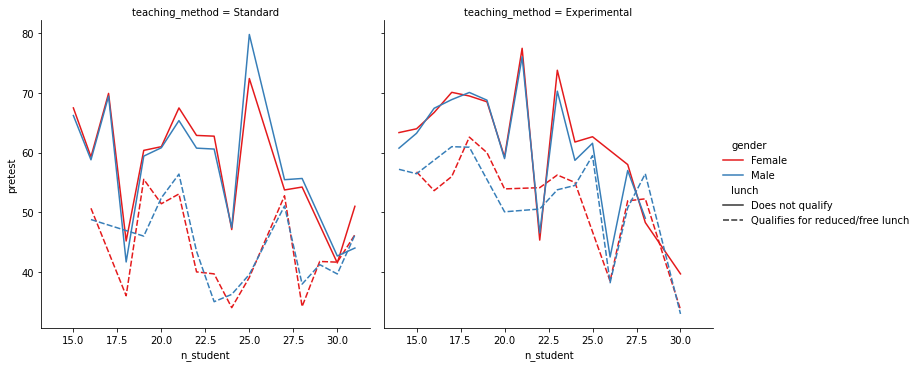

In [35]:
sns.relplot(x="n_student", y="pretest", hue="gender",style="lunch",col="teaching_method", ci=None, kind="line", data=df, palette="Set1");


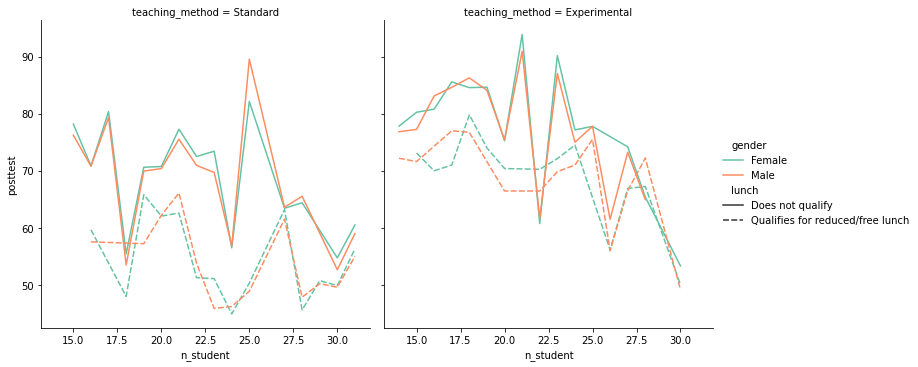

In [36]:
sns.relplot(x="n_student", y="posttest", hue="gender", style="lunch",col="teaching_method", ci=None, kind="line", data=df, palette="Set2");


Comparing above two charts for students I observed the rate of posttest score increased than pretest score who qualified for lunch 

large number of population of students who doesnot qualified for lunch has highest pretest and posttest score.

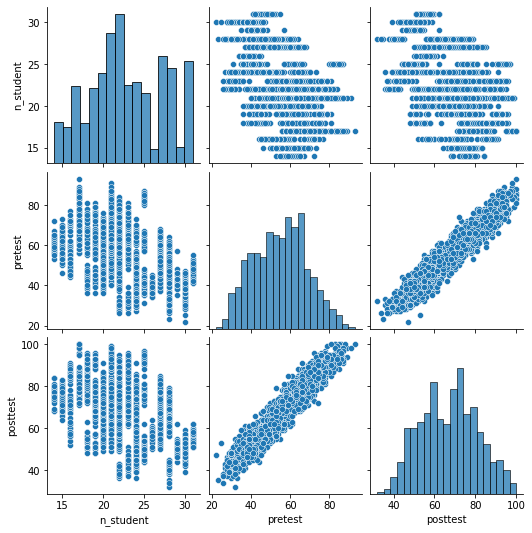

In [37]:
sns.pairplot(df[['school_setting', 'school_type', 'teaching_method', 'n_student', 'gender', 'lunch', 'pretest', 'posttest']])


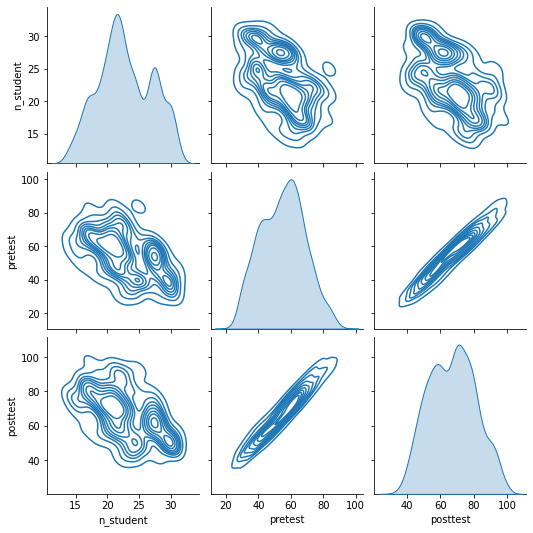

In [38]:
sns.pairplot(df[['school_setting', 'school_type', 'teaching_method', 'n_student', 'gender', 'lunch', 'pretest', 'posttest']], kind="kde")


Data Modeling

In [39]:
df2 = df.drop(['classroom','student_id'], axis = 1)
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [40]:
features = pd.get_dummies(df2)

features.rename(columns = {'school_type_Non-public' : 'school_type_Non_public','lunch_Does not qualify':'lunch_Does_not_qualify', 'lunch_Qualifies for reduced/free lunch':'lunch_Qualifies_for_reduced/free_lunch'}, inplace = True)


features.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,school_GOOBU,school_IDGFP,school_KFZMY,school_KZKKE,school_LAYPA,school_OJOBU,school_QOQTS,school_UAGPU,school_UKPGS,school_UUUQX,school_VHDHF,school_VKWQH,school_VVTVA,school_ZMNYA,school_ZOWMK,school_setting_Rural,school_setting_Suburban,school_setting_Urban,school_type_Non_public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does_not_qualify,lunch_Qualifies_for_reduced/free_lunch
0,20.0,62.0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
1,20.0,66.0,79.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
2,20.0,64.0,76.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
3,20.0,61.0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
4,20.0,64.0,76.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0


In [41]:
X = features.drop('posttest', axis=1)
y = features["posttest"]

In [42]:
# Splitting the data set 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

def test_score(y_test, y_pred):
    """Helper function for evaluation metrics."""
    accuracy = explained_variance_score(y_test, y_pred) * 100
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    print(f"""accuracy: {accuracy:.2f}""")
    print(f"""MAE: {mae:.2f}""")
  
    return accuracy

In [44]:
accuracy_scores = np.zeros(10, dtype="float64")

In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
accuracy_scores[0] = test_score(y_test, y_pred)

accuracy: 95.00
MAE: 2.50


In [46]:
#Lasso Regression
from sklearn.linear_model import LassoCV

reg1 = LassoCV().fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
accuracy_scores[1] = test_score(y_test, y_pred1)

accuracy: 94.54
MAE: 2.61


In [47]:
#Descision Tree Regression
from sklearn.tree import DecisionTreeRegressor

reg2 = DecisionTreeRegressor().fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
accuracy_scores[2] = test_score(y_test, y_pred2)

accuracy: 91.39
MAE: 3.26


In [48]:
#Support Vector Regressor
from sklearn.svm import SVR

reg3 = SVR().fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
accuracy_scores[3] = test_score(y_test, y_pred3)

accuracy: 91.42
MAE: 3.38


In [49]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

reg4 = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred4 = reg4.predict(X_test)
accuracy_scores[4] = test_score(y_test, y_pred4)

accuracy: 94.38
MAE: 2.63


In [50]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

reg5 = GradientBoostingRegressor(n_estimators=100, random_state=42)
reg5.fit(X_train, y_train)
y_pred5 = reg5.predict(X_test)
accuracy_scores[5] = test_score(y_test, y_pred5)

accuracy: 94.97
MAE: 2.48


In [51]:
#XGBoost Regressor
from xgboost import XGBRegressor

xg_model = XGBRegressor(objectvie='reg:linear', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)

accuracy_scores[6] = test_score(y_test, xg_pred)

[21:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
accuracy: 94.99
MAE: 2.48


In [52]:
#LightGBM Regressor
import lightgbm 
lgb_model = lightgbm.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

accuracy_scores[7] = test_score(y_test, lgb_pred)

accuracy: 95.04
MAE: 2.48


In [53]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ABR_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ABR_model.fit(X_train, y_train)
ABR_pred = ABR_model.predict(X_test)

accuracy_scores[8] = test_score(y_test, ABR_pred)


accuracy: 93.68
MAE: 2.82


In [54]:
#Regression with Tensorflow
#pip install --upgrade tensorflow
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
print(tf.__version__)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mae"])


2.6.0


In [55]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               3700      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 10,051
Trainable params: 10,051
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 20ms/step - loss: 4643.0938 - mae: 66.7092 - val_loss: 4506.1069 - val_mae: 65.6831
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 4390.1582 - mae: 64.8138 - val_loss: 4183.4717 - val_mae: 63.2133
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 3970.4692 - mae: 61.5231 - val_loss: 3608.5413 - val_mae: 58.5833
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 3240.9900 - mae: 55.3699 - val_loss: 2646.2119 - val_mae: 49.9541
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 2105.0581 - mae: 44.1344 - val_loss: 1334.6000 - val_mae: 34.9037
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 816.6616 - mae: 25.9889 - val_loss: 267.3624 - val_mae: 13.9089
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 144.9213 - mae: 9.5603 - val_loss: 116.8399 - val_mae: 8.7239
Epoch 8/100
11/11 [=============

In [57]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 11.0464 - mae: 2.6296


[11.046354293823242, 2.629621982574463]

In [58]:
tensor_pred = model.predict(X_test)

accuracy_scores[9] = test_score(y_test, tensor_pred)

accuracy: 94.52
MAE: 2.63


Make predictions
Finally, predict have a look at the errors made by the model when making predictions on the test set:

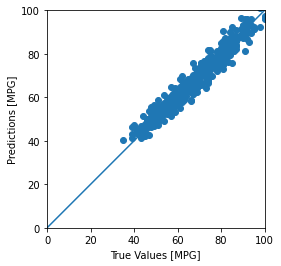

In [59]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, tensor_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It looks like the model predicts reasonably well.

Now take a look at the error distribution:

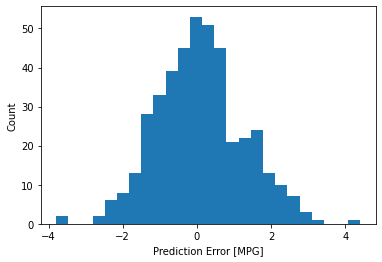

In [60]:
error = test_predictions - y_pred
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

Mean Squared Error (MSE) and Mean Absolute Error (MAE) are common loss functions used for regression problems. Mean Absolute Error is less sensitive to outliers. Different loss functions are used for classification problems.

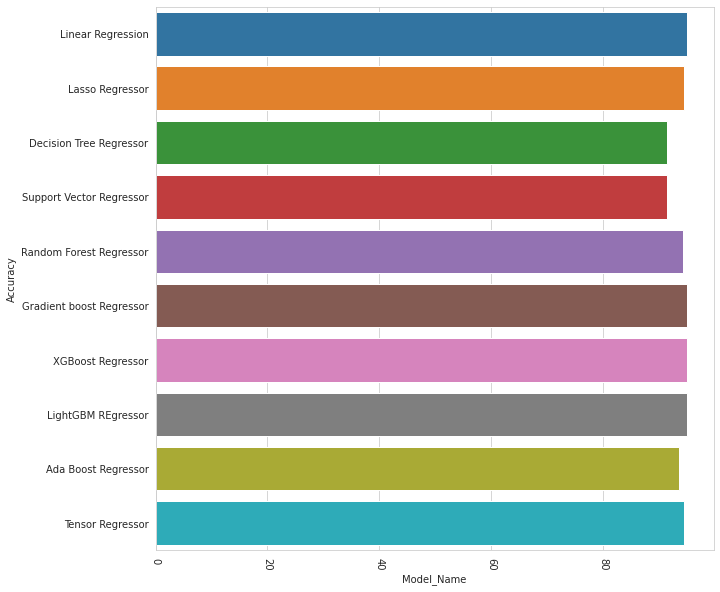

In [61]:
sns.set_style('whitegrid')

models = ["Linear Regression","Lasso Regressor","Decision Tree Regressor","Support Vector Regressor","Random Forest Regressor","Gradient boost Regressor","XGBoost Regressor","LightGBM REgressor","Ada Boost Regressor","Tensor Regressor"]


plt.figure(figsize=(10, 10))
sns.barplot(x=accuracy_scores, y=models)


plt.xlabel("Model_Name")
plt.xticks(rotation = -90)
plt.ylabel("Accuracy")

plt.show()

<Figure size 720x720 with 0 Axes>

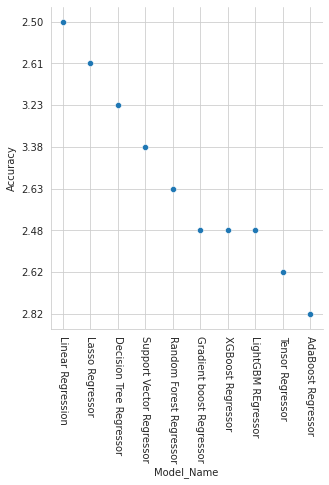

In [62]:
sns.set_style('whitegrid')
models = ["Linear Regression","Lasso Regressor","Decision Tree Regressor","Support Vector Regressor","Random Forest Regressor","Gradient boost Regressor","XGBoost Regressor","LightGBM REgressor","Tensor Regressor","AdaBoost Regressor"]

mae = ["2.50","2.61","3.23","3.38","2.63","2.48","2.48","2.48","2.62","2.82"]

plt.figure(figsize=(10, 10))
sns.relplot(x=models, y=mae)

plt.xlabel("Model_Name")
plt.xticks(rotation = -90)
plt.ylabel("Accuracy")

plt.show()

Conclusion


From the above comparision of all algorithms with thier acccuracy and mean_absolute_error

LightGBM boosting model performs well with accuracy of 95.04 and mae of 2.48

If you clearly observe the accuracy and mean_absolute error yielded by boosting algorithms are similar nearly so, Boosting models works well on the dataset.